In [41]:
import argparse
import logging
import sys
import numpy as np
import torch
from utils import compute_mean_dice
import pandas as pd
import os
from glob import glob
from matplotlib import pyplot as plt
import monai
import torchinfo
import nibabel as nib
from monai.transforms import AsDiscrete
from miseval import evaluate
from scipy.io import savemat
import itk
import SimpleITK as sitk
import random
import subprocess
import sys

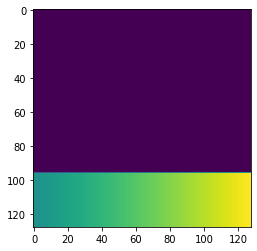

In [69]:
fake_img = np.zeros((128,128))
for i in range(128):
    fake_img[96:,i] = 0.5*(1+i/128)
imgplot = plt.imshow(fake_img)

(2, 128, 128)


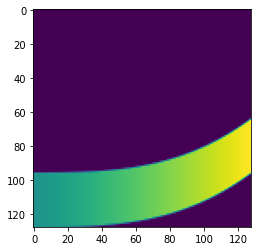

In [103]:
fake_ddf_x = np.zeros((128,128))
p = 3
for i in range(128):
    fake_ddf_x[64:,i] = i**p/(128**p)*32
    #print(fake_ddf_x[100,i])
fake_ddf_y = np.zeros((128,128))

#imgplot = plt.imshow(fake_ddf_x)
#plt.figure()
fake_ddf = np.stack((fake_ddf_x, fake_ddf_y))
print(fake_ddf.shape)

warp = monai.networks.blocks.Warp("bilinear", "zeros")
fake_img_np = torch.from_numpy(fake_img).unsqueeze(0).unsqueeze(0)
fake_ddf_np = torch.from_numpy(fake_ddf).unsqueeze(0)
test = warp(fake_img_np,fake_ddf_np).squeeze()
imgplot = plt.imshow(test.numpy())
#plt.figure()